In [2]:
import pandas as pd
import os
import string
# nltk for optional text processing (stemming/lemmatization)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import glob

In [5]:
# Load the dataset
file_paths = glob.glob(os.path.join("raw_data/", "*.csv"))
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)
# df = pd.read_csv('songs_with_lyrics1.csv')
df = pd.concat(dfs)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 37025 entries, 0 to 5545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            37025 non-null  object
 1   song_name     37025 non-null  object
 2   artist_names  37025 non-null  object
 3   album_name    37025 non-null  object
 4   lyrics        37025 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


,id,song_name,artist_names,album_name,lyrics
0,0a8pD243dhPtQkWvpAQpt7,Get Your Hands off My Woman,The Darkness,6vW9ZDllNv87WHXS3XTjlM,8 ContributorsGet Your Hands Off My Woman Lyri...
1,77asYwewm0lXvz76inosJm,Growing on Me,The Darkness,6vW9ZDllNv87WHXS3XTjlM,12 ContributorsGrowing on Me Lyrics[Intro]\nGo...
2,756CJtQRFSxEx9jV4P9hpA,I Believe in a Thing Called Love,The Darkness,6vW9ZDllNv87WHXS3XTjlM,29 ContributorsI Believe in a Thing Called Lov...
3,1Xiziz94CF3sFctb1udhAm,Love Is Only a Feeling,The Darkness,6vW9ZDllNv87WHXS3XTjlM,7 ContributorsLove Is Only a Feeling Lyrics[Ve...
4,3LDsZ7JCzTwfuTRuteUqtB,Givin' Up,The Darkness,6vW9ZDllNv87WHXS3XTjlM,4 ContributorsGivin’ Up Lyrics[Verse 1]\nMy ma...


In [6]:
# Ensure necessary nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Handling Missing Values: Remove rows with NaN in any column
df.dropna(inplace=True)

# Additional Criteria: Ignore songs with no lyrics
df = df[df['lyrics'].str.strip().astype(bool)]

# Data Normalization
# Convert to lowercase
df['lyrics'] = df['lyrics'].apply(lambda x: x.lower())
# Remove punctuation
df['lyrics'] = df['lyrics'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Optional: Apply stemming/lemmatization
# Initialize stemmer
stemmer = PorterStemmer()

# Function to stem tokens
def stem_sentence(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(stemmed_tokens)


[nltk_data] Downloading package punkt to /Users/yidan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yidan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df.head()

,id,song_name,artist_names,album_name,lyrics
0,0a8pD243dhPtQkWvpAQpt7,Get Your Hands off My Woman,The Darkness,6vW9ZDllNv87WHXS3XTjlM,8 contributorsget your hands off my woman lyri...
1,77asYwewm0lXvz76inosJm,Growing on Me,The Darkness,6vW9ZDllNv87WHXS3XTjlM,12 contributorsgrowing on me lyricsintro\ngo\n...
2,756CJtQRFSxEx9jV4P9hpA,I Believe in a Thing Called Love,The Darkness,6vW9ZDllNv87WHXS3XTjlM,29 contributorsi believe in a thing called lov...
3,1Xiziz94CF3sFctb1udhAm,Love Is Only a Feeling,The Darkness,6vW9ZDllNv87WHXS3XTjlM,7 contributorslove is only a feeling lyricsver...
4,3LDsZ7JCzTwfuTRuteUqtB,Givin' Up,The Darkness,6vW9ZDllNv87WHXS3XTjlM,4 contributorsgivin’ up lyricsverse 1\nmy mama...


In [9]:
# Saving each song to a separate CSV file
for index, row in df.iterrows():
    # Define a filename using the song's ID
    filename = f"song_{row['id']}.csv"
    # Save the single row to a CSV file
    row.to_frame().T.to_csv(os.path.join('final/', filename), index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 2.8 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


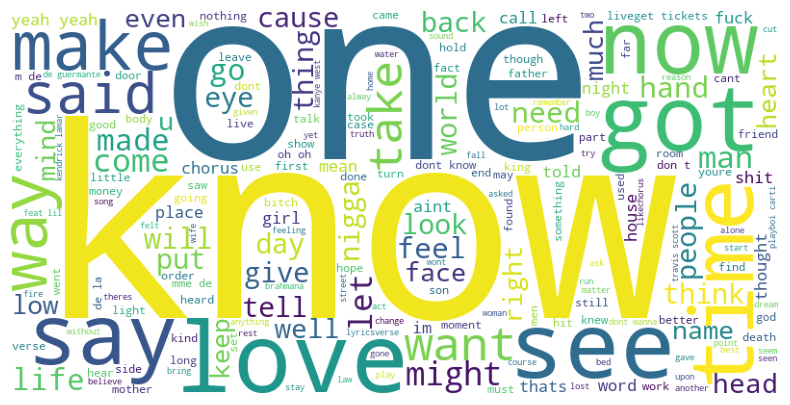

In [12]:
# %pip install wordcloud
# %pip install textblob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Assuming 'df' is your DataFrame after preprocessing
# Word count in lyrics
df['word_count'] = df['lyrics'].apply(lambda x: len(x.split()))


# Most common words in lyrics (word cloud)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['lyrics']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

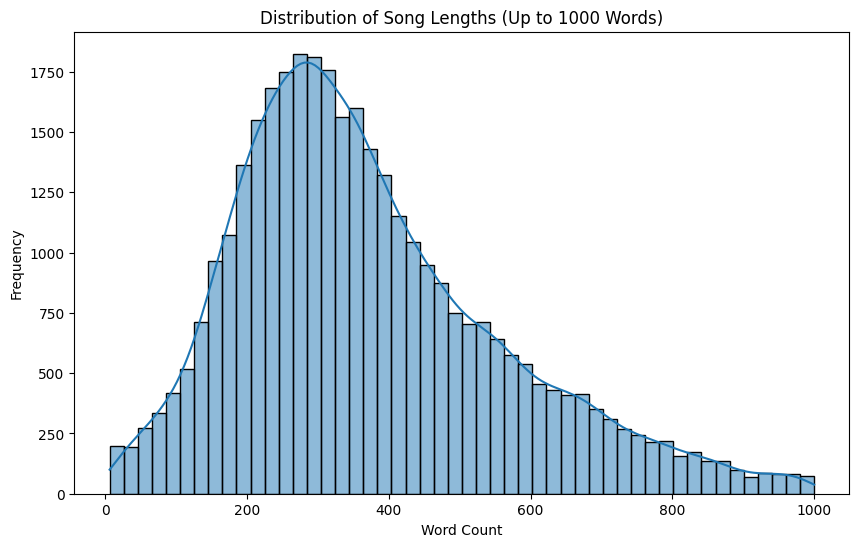

In [13]:
filtered_df = df[df['word_count'] <= 1000]

# Plot distribution of song lengths for filtered DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['word_count'], bins=50, kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Song Lengths (Up to 1000 Words)')
plt.show()

In [14]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each song's lyrics
df['sentiment'] = df['lyrics'].apply(calculate_sentiment)

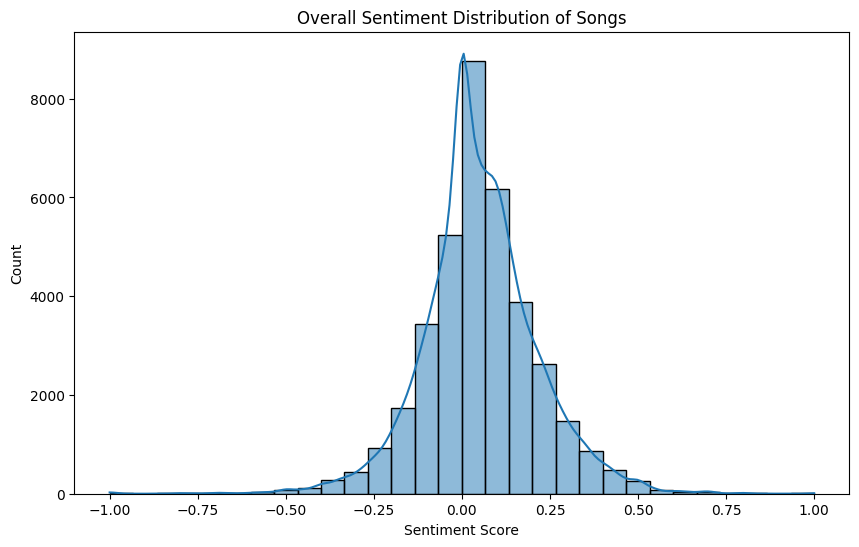

/var/folders/dz/_kg4kpk160d653__f0w9lxbm0000gn/T/ipykernel_4944/1018713624.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


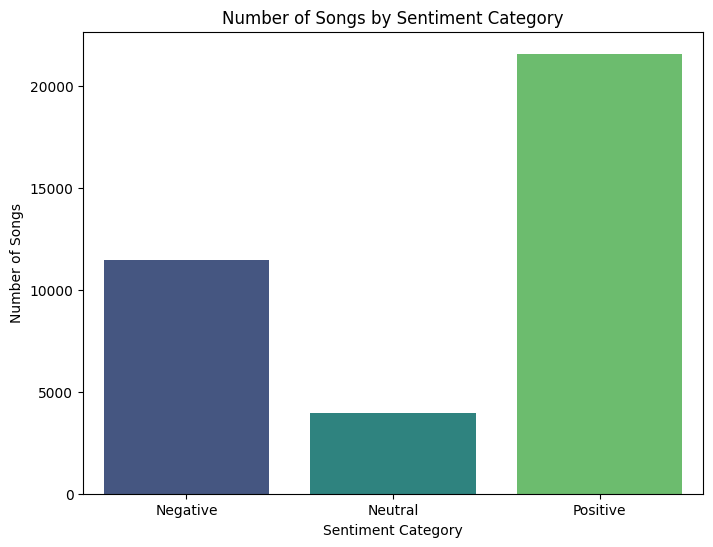

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Overall Sentiment Distribution of Songs')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# To categorize sentiments as positive, negative, or neutral
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of songs in each category
sentiment_counts = df['sentiment_category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Number of Songs by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Songs')
plt.show()

In [16]:
# Sample exploration of song that might categorized as romance 
# Keywords associated with romance songs
romance_keywords = ['love', 'heart', 'dear', 'darling', 'sweetheart', 'romance']

# Function to categorize songs based on keywords
def is_romance_song(lyrics):
    return any(keyword in lyrics for keyword in romance_keywords)

# Apply the categorization
df['is_romance'] = df['lyrics'].apply(is_romance_song)

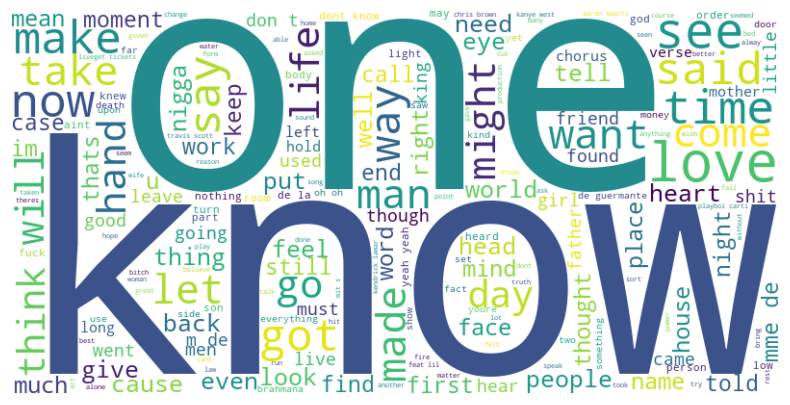

In [17]:
from wordcloud import WordCloud

# Filter to romance songs
romance_songs = df[df['is_romance']]

# Generate a word cloud for romance songs
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(romance_songs['lyrics']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

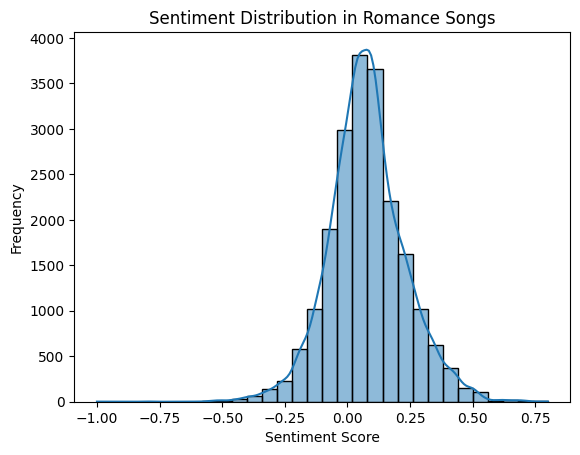

In [18]:
# Assuming you've already calculated sentiment scores
sns.histplot(romance_songs['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution in Romance Songs')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

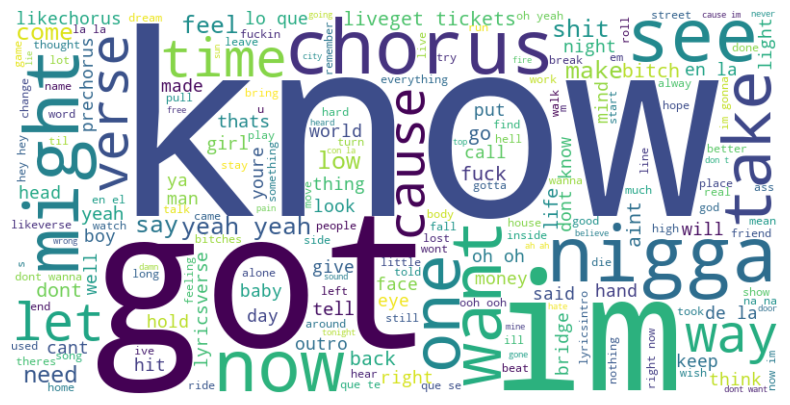

In [19]:
non_romance_songs = df[~df['is_romance']]
# Generate a word cloud for non-romance songs
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(non_romance_songs['lyrics']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

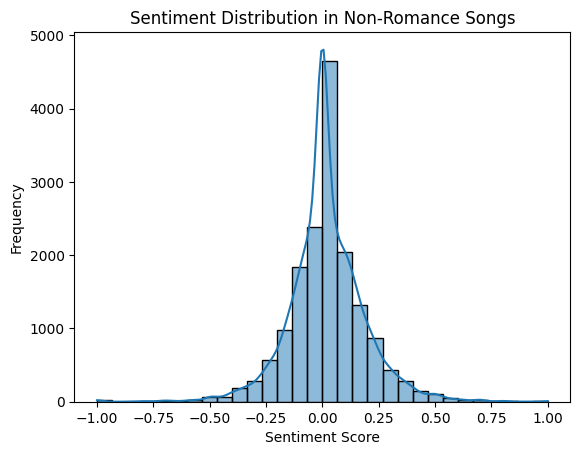

In [20]:
# Plot sentiment distribution for non-romance songs
sns.histplot(non_romance_songs['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution in Non-Romance Songs')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30513 entries, 0 to 5545
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  30513 non-null  object  
 1   song_name           30513 non-null  object  
 2   artist_names        30513 non-null  object  
 3   album_name          30513 non-null  object  
 4   lyrics              30513 non-null  object  
 5   word_count          30513 non-null  int64   
 6   sentiment           30513 non-null  float64 
 7   sentiment_category  30497 non-null  category
 8   is_romance          30513 non-null  bool    
dtypes: bool(1), category(1), float64(1), int64(1), object(5)
memory usage: 1.9+ MB
